# Descriptive plots

Now having the cleaned and proccessed data we can plot some descriptive plots on how is the state of global emissions up to 2021 globally and by regions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet(r'../data/FAOSTAT/clean_data/all_tables_processed/full_country_dataset_v4_TOTALS.parquet')
data = data.query("Year > 1990")

In [3]:
total_col = 'Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt'

columns_partials = [
        'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
        'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt',
        'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt'
]

pop_col = 'Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No'

## CO2 emissions global tendency

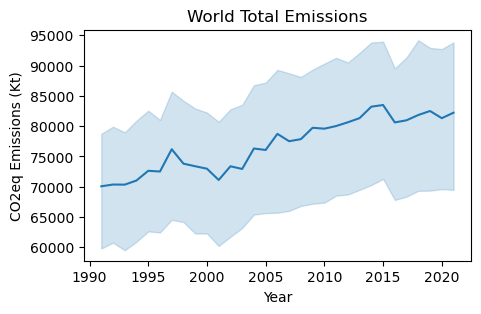

In [4]:
plot_data = data[data['Area Code'] < 1000] 
plt.figure(figsize=(5, 3))
sns.lineplot(data=plot_data, x='Year', y=total_col, errorbar=('ci', 50))
plt.title("World Total Emissions")
plt.ylabel('CO2eq Emissions (Kt)')
plt.savefig(f"../plots/world_total.pdf", bbox_inches='tight')
plt.show()
# plt.yscale('log')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


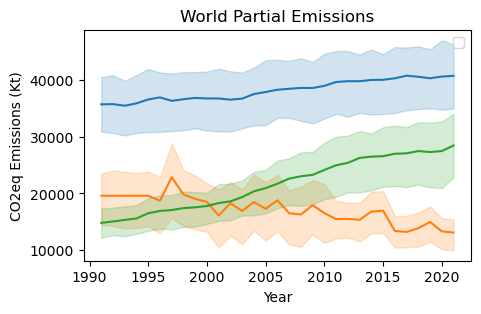

In [5]:
plot_data = data[data['Area Code'] < 1000]

plt.figure(figsize=(5, 3))
for col in columns_partials:
    sns.lineplot(data=plot_data, x='Year', y=col, errorbar=('ci', 50))
plt.title("World Partial Emissions")
plt.ylabel('CO2eq Emissions (Kt)')
plt.legend()
plt.savefig(f"../plots/partials.pdf", bbox_inches='tight')
plt.show()

#### Emissions by countries - Bubble Plot

In [15]:
continent_df = pd.read_csv("../data/FAOSTAT/clean_data/food_trading/country_to_continent.csv")

In [16]:
plot_data = data[data['Area Code'] < 1000]
plot_data = pd.merge(plot_data, continent_df, left_on='Area', right_on='Country', how='left')
plot_data = plot_data.dropna()

In [17]:
# Agrupar por 'Area', 'Year', y sumar 'total_col' y pop_col
grouped_data = plot_data.groupby(['Area', 'Year', 'Continent']).agg(
    {total_col: 'sum', pop_col: 'sum'}).reset_index()

# Filtrar los datos entre 1990 y 2021
filtered_data = grouped_data[(grouped_data['Year'] >= 1990) & (grouped_data['Year'] <= 2021)]
filtered_data

,Area,Year,Continent,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No
0,Afghanistan,1991,Asia,9942.2755,10745.167
1,Afghanistan,1992,Asia,10001.9592,12057.433
2,Afghanistan,1993,Asia,10087.9383,14003.760
3,Afghanistan,1994,Asia,10225.0284,15455.555
4,Afghanistan,1995,Asia,10727.9492,16418.912
...,...,...,...,...,...
5668,Zimbabwe,2017,Africa,24813.0988,14751.101
5669,Zimbabwe,2018,Africa,25181.4470,15052.184
5670,Zimbabwe,2019,Africa,24933.4963,15354.608
5671,Zimbabwe,2020,Africa,23834.1472,15669.666


In [18]:
plot_data[plot_data['Year'] == 1990]

,Area Code,Year,Area,Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Crop_Residues_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt,...,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD,Continent,Country,Capital,Latitude,Longitude


In [19]:
# Filtrar datos para el año 1990
data_1990 = plot_data[plot_data['Year'] == 1991]

# Seleccionar los 100 países con el valor más alto en 'total_col'
top_100_countries = data_1990.nlargest(100, total_col)['Area']
top_100_countries

620                       Brazil
2759                   Indonesia
7502                       China
6572                        USSR
6665    United States of America
                  ...           
3627                      Malawi
5301       Serbia and Montenegro
1271                  Costa Rica
31                   Afghanistan
3007                     Jamaica
Name: Area, Length: 100, dtype: object

In [20]:
filtered_data.groupby('Area')[total_col].sum().sort_values()

Area
Tokelau       2.225640e+01
Niue          1.091883e+02
Monaco        1.844436e+02
San Marino    2.236133e+02
Tuvalu        2.678979e+02
                  ...     
India         3.317925e+07
Indonesia     3.390560e+07
USSR          3.410254e+07
Brazil        5.750342e+07
China         5.832010e+07
Name: Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt, Length: 183, dtype: float64

In [21]:
filtered_data

,Area,Year,Continent,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No
0,Afghanistan,1991,Asia,9942.2755,10745.167
1,Afghanistan,1992,Asia,10001.9592,12057.433
2,Afghanistan,1993,Asia,10087.9383,14003.760
3,Afghanistan,1994,Asia,10225.0284,15455.555
4,Afghanistan,1995,Asia,10727.9492,16418.912
...,...,...,...,...,...
5668,Zimbabwe,2017,Africa,24813.0988,14751.101
5669,Zimbabwe,2018,Africa,25181.4470,15052.184
5670,Zimbabwe,2019,Africa,24933.4963,15354.608
5671,Zimbabwe,2020,Africa,23834.1472,15669.666


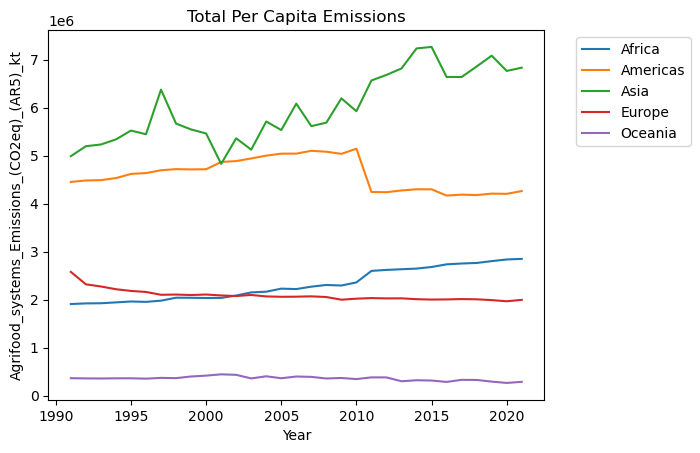

In [22]:
continents = [
        'Africa',
        'Americas',
        'Asia',
        'Europe',
        'Oceania',
        # 'World'
]

regions = data[data['Area Code'] > 1000]
plot_data = regions[regions['Area'].isin(continents)]

sns.lineplot(data=plot_data, x='Year', y=total_col, hue='Area')
plt.title("Total Per Capita Emissions")
# plt.yscale('log')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

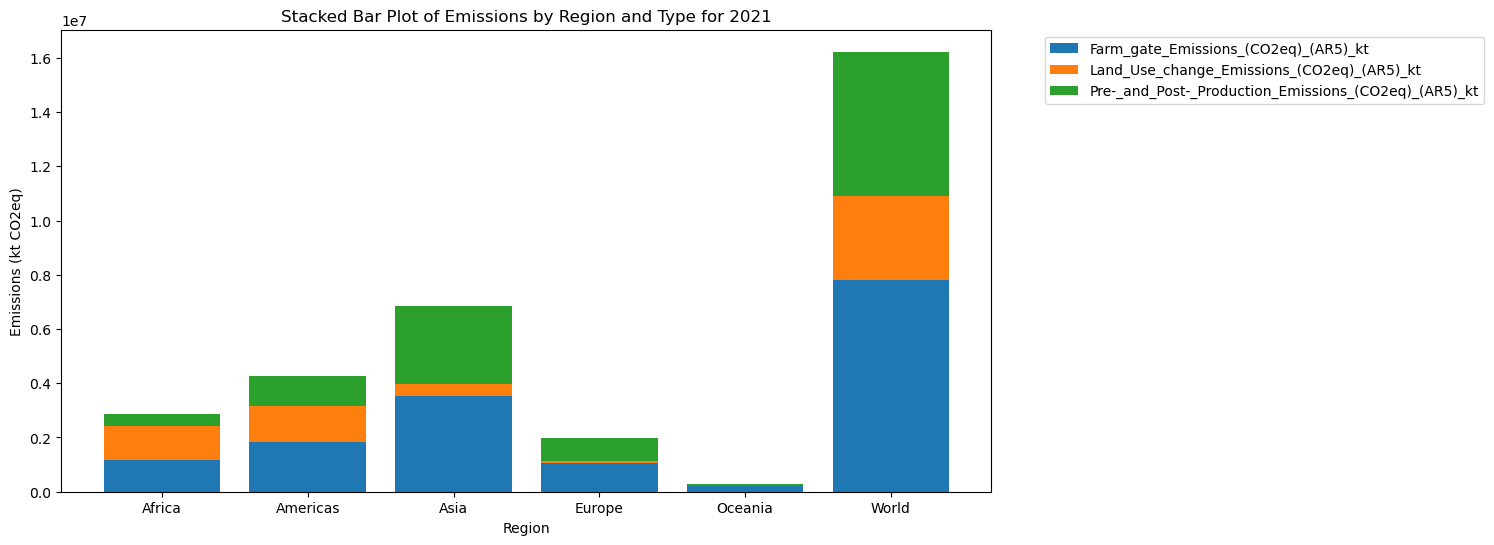

In [25]:
# Create stacked bar plot for the year 2021

continents = [
        'Africa',
        'Americas',
        'Asia',
        'Europe',
        'Oceania',
        'World'
]

columns_partials = [
        'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
        'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt',
        'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt'
]

plot_data = data[(data['Area'].isin(continents)) & (data['Year'] == 2021)]

# Group by Area, then sum the emissions
grouped_data = plot_data.groupby('Area')[columns_partials].sum().reset_index()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
bottom = np.zeros(len(grouped_data))
for col in columns_partials:
    plt.bar(grouped_data['Area'], grouped_data[col], bottom=bottom, label=col)
    bottom += grouped_data[col]

plt.title("Stacked Bar Plot of Emissions by Region and Type for 2021")
plt.xlabel("Region")
plt.ylabel("Emissions (kt CO2eq)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

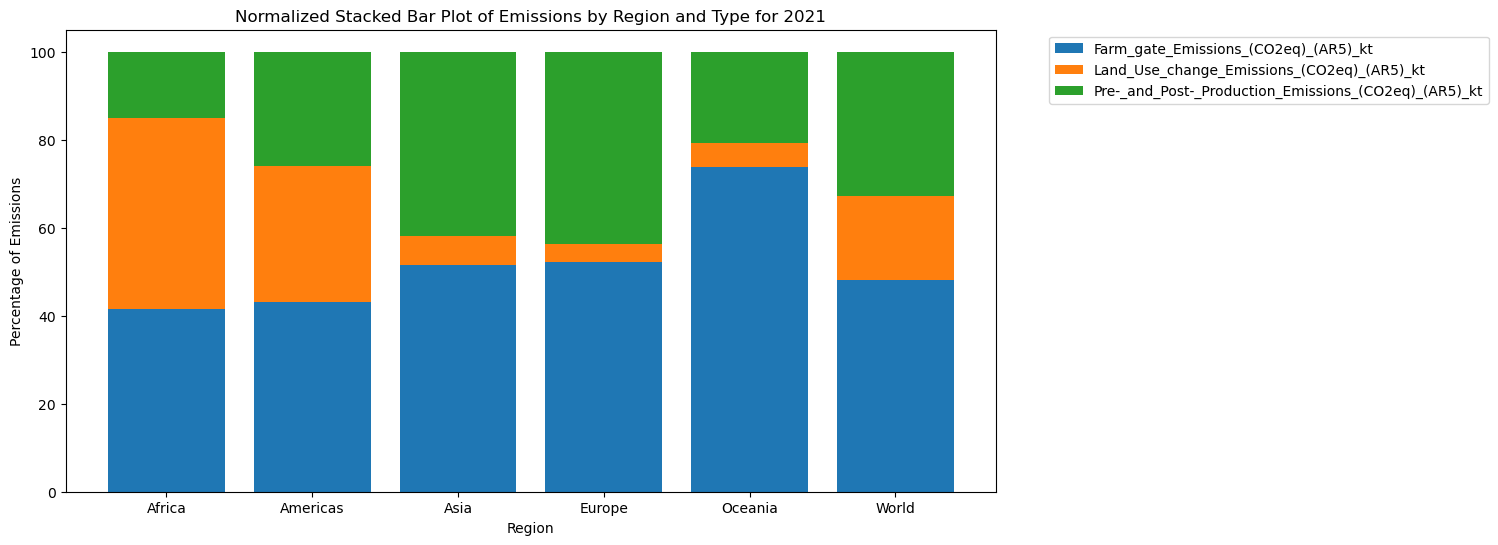

In [26]:
# Create normalized stacked bar plot for the year 2021

continents = [
        'Africa',
        'Americas',
        'Asia',
        'Europe',
        'Oceania',
        'World'
]

columns_partials = [
        'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
        'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt',
        'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt'
]

plot_data = data[(data['Area'].isin(continents)) & (data['Year'] == 2021)]

# Group by Area, then sum the emissions
grouped_data = plot_data.groupby('Area')[columns_partials].sum().reset_index()

# Normalize the columns to percentages
grouped_data[columns_partials] = grouped_data[columns_partials].div(grouped_data[columns_partials].sum(axis=1), axis=0) * 100

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
bottom = np.zeros(len(grouped_data))
for col in columns_partials:
    plt.bar(grouped_data['Area'], grouped_data[col], bottom=bottom, label=col)
    bottom += grouped_data[col]

plt.title("Normalized Stacked Bar Plot of Emissions by Region and Type for 2021")
plt.xlabel("Region")
plt.ylabel("Percentage of Emissions")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()